In [19]:
import pywt
import pywt.data
import cv2
import h5py
from typing import Tuple
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import hassCS
import skimage.metrics 
from tqdm.notebook import tqdm
import sewar

In [2]:
filename = "data.h5"
original = h5py.File(filename,'r')
keys= [key for key in original.keys()]

## accessing one file

n1 =original.get(keys[0])
arr = n1[()]

#original = arr

In [35]:
fid = h5py.File(filename,'r')

arr = np.zeros([256,256,256])
for ix,k in enumerate(fid):
    print(k)
    data = fid[k][()]
    if ix==1:
        break
    arr= data + arr
arr = np.array(arr)
arr.shape

c2_F_c001.sdt
c2_F_c002.sdt


(256, 256, 256)

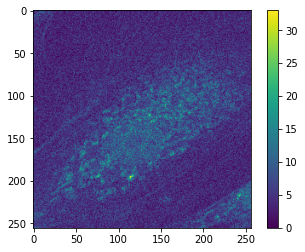

In [36]:
plt.imshow(arr.sum(2))
plt.colorbar()

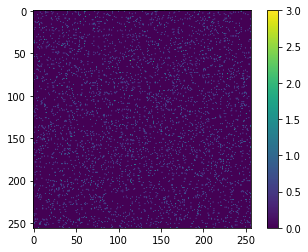

In [38]:
original = arr[:,:,0:10]
plt.imshow(original.sum(2))
plt.colorbar()


In [6]:
#  psnr vs  numberofslices, numberoftimebins, alpha, W, W_inv, tau, lambda_, max_iter

In [7]:
psnr = skimage.metrics.peak_signal_noise_ratio

In [40]:
%%time
sparsity = []
img_corr = []
for i in range(4,256,4):
    original = arr[:,:,0:i]
    cs = hassCS.compressed_sensing(original)
    X_reconstructed, Xw = cs.runCS()
    sparsity.append(hassCS.gini(original))
    img_corr.append(sewar.scc(original,X_reconstructed))

CPU times: total: 1h 7min 12s
Wall time: 2h 44min 6s


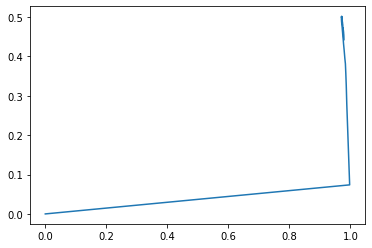

In [41]:
plt.plot(sparsity,img_corr)

In [9]:
X_reconstructed.min(),X_reconstructed.max()

(-0.205625797036181, 8.970218217762046)

In [10]:
import skimage.util as sku
Xr = sku.img_as_ubyte(X_reconstructed/X_reconstructed.max())
Xr.min(), Xr.max()

(0, 255)

In [11]:
type(original), type(Xr)

(numpy.ndarray, numpy.ndarray)

In [12]:
# Calculate PSNR and SSIM
psnr_value = psnr(original, Xr,data_range=2**8)
#ssim_value = ssim(arr, X_reconstructed, structural_similarity=True)

print(f"PSNR: {psnr_value}")
#print(f"SSIM: {ssim_value}")


PSNR: 24.761888846976476


Original Image Sparsity: 0.7491097527023708
Image Correlation: 0.63243635323145


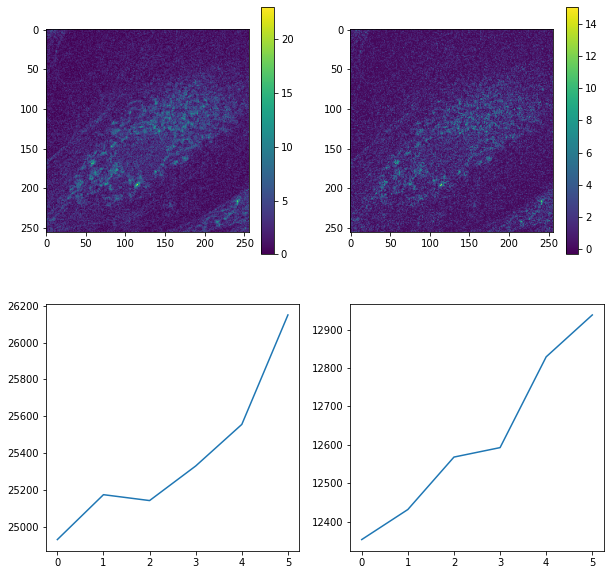

In [22]:
#Want to have something that can detect properties of the image in the space, for example if there are orthogonal lines in a picture can we detect these lines in the space
#Also add better metrics and see if operations are similar
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

original_spectral = original.sum((0,1))
reconstructed_spectral = X_reconstructed.sum((0,1))
im0 = axs[0,0].imshow(original.sum(2))
plt.colorbar(im0)
im1 = axs[0,1].imshow(X_reconstructed.sum(2))
plt.colorbar(im1)
axs[1,0].plot(original_spectral)
axs[1,1].plot(reconstructed_spectral)
print("Original Image Sparsity: "+ str(hassCS.gini(original)))
print("Image Correlation: "+str(sewar.scc(original,X_reconstructed)))

In [14]:
Xw.keys()

dict_keys(['aaa', 'aad', 'ada', 'add', 'daa', 'dad', 'dda', 'ddd'])

(130, 130, 5)
(130, 130, 5)
(130, 130, 5)
(130, 130, 5)
(130, 130, 5)
(130, 130, 5)
(130, 130, 5)
(130, 130, 5)


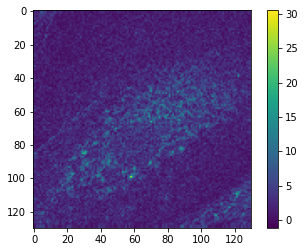

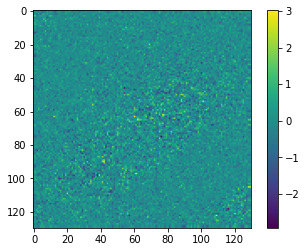

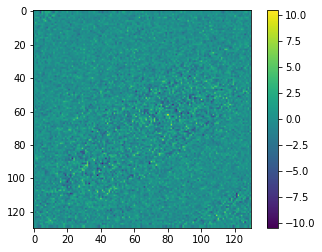

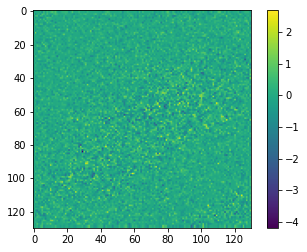

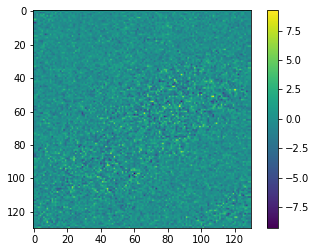

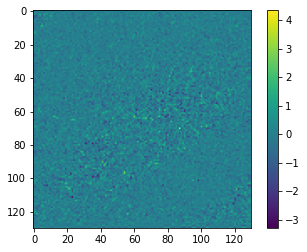

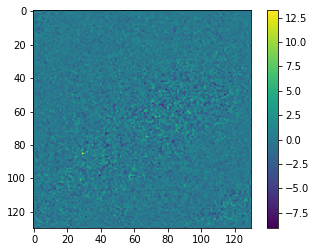

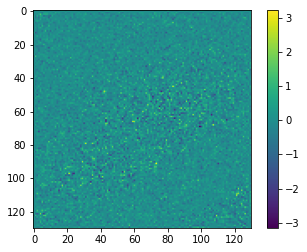

In [15]:
for k in Xw.keys():
    print(Xw[k].shape)
    plt.figure()
    plt.imshow(Xw[k].sum(2))
    plt.colorbar()